In [3]:
# 19.2.2 Build a Basic Neural Network
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

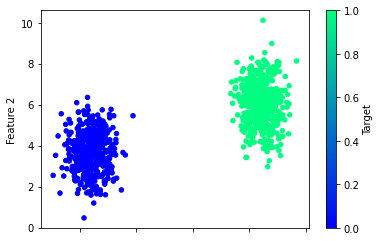

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [7]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [9]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
# 19.2.3 Train and Test a Basic Neural Network
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 564us/step - loss: 0.6423 - accuracy: 0.7658
Epoch 2/100
24/24 [==============================] - 0s 621us/step - loss: 0.6374 - accuracy: 0.7674
Epoch 3/100
24/24 [==============================] - 0s 651us/step - loss: 0.6191 - accuracy: 0.8188
Epoch 4/100
24/24 [==============================] - 0s 609us/step - loss: 0.6110 - accuracy: 0.8005
Epoch 5/100
24/24 [==============================] - 0s 650us/step - loss: 0.5978 - accuracy: 0.8287
Epoch 6/100
24/24 [==============================] - 0s 737us/step - loss: 0.5924 - accuracy: 0.8308
Epoch 7/100
24/24 [==============================] - 0s 807us/step - loss: 0.5794 - accuracy: 0.8506
Epoch 8/100
24/24 [==============================] - 0s 737us/step - loss: 0.5695 - accuracy: 0.8377
Epoch 9/100
24/24 [==============================] - 0s 689us/step - loss: 0.5530 - accuracy: 0.8588
Epoch 10/100
24/24 [==============================] - 0s 781us/step - loss: 0.5406 - accura

Epoch 81/100
24/24 [==============================] - 0s 738us/step - loss: 0.1127 - accuracy: 0.9989
Epoch 82/100
24/24 [==============================] - 0s 652us/step - loss: 0.1073 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 694us/step - loss: 0.1127 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 695us/step - loss: 0.1042 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 676us/step - loss: 0.1022 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 606us/step - loss: 0.1048 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 677us/step - loss: 0.0998 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 650us/step - loss: 0.0995 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 650us/step - loss: 0.0963 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 695us/step - loss: 0.0931

<AxesSubplot:>

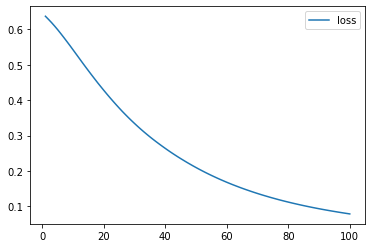

In [13]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

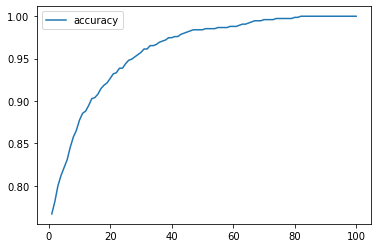

In [14]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0730 - accuracy: 1.0000
Loss: 0.07301867008209229, Accuracy: 1.0


In [16]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

In [17]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

C:\Users\mathg\anaconda3\envs\mlenv\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

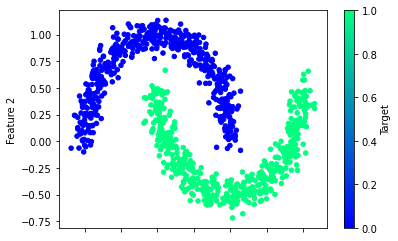

In [18]:
# 19.2.4 Nuances of Neural Networks on Nonlinear Numbers
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [19]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [20]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 1.1994 - accuracy: 0.4200
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 1.0374 - accuracy: 0.4480
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.9342 - accuracy: 0.4773
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8645 - accuracy: 0.5000
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.8152 - accuracy: 0.5240
Epoch 6/100
24/24 [==============================] - 0s 986us/step - loss: 0.7765 - accuracy: 0.5427
Epoch 7/100
24/24 [==============================] - 0s 997us/step - loss: 0.7438 - accuracy: 0.5613
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7153 - accuracy: 0.5747
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6901 - accuracy: 0.5880
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6676 - accuracy: 0.5933
Epoch

24/24 [==============================] - 0s 2ms/step - loss: 0.2788 - accuracy: 0.8800
Epoch 83/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2779 - accuracy: 0.8813
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2771 - accuracy: 0.8813
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2763 - accuracy: 0.8827
Epoch 86/100
24/24 [==============================] - 0s 999us/step - loss: 0.2756 - accuracy: 0.8840
Epoch 87/100
24/24 [==============================] - 0s 999us/step - loss: 0.2748 - accuracy: 0.8840
Epoch 88/100
24/24 [==============================] - 0s 912us/step - loss: 0.2741 - accuracy: 0.8853
Epoch 89/100
24/24 [==============================] - 0s 1000us/step - loss: 0.2734 - accuracy: 0.8867
Epoch 90/100
24/24 [==============================] - 0s 952us/step - loss: 0.2727 - accuracy: 0.8880
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2720 - accuracy: 0.8880
Ep

<AxesSubplot:>

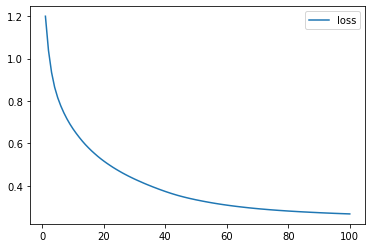

In [21]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

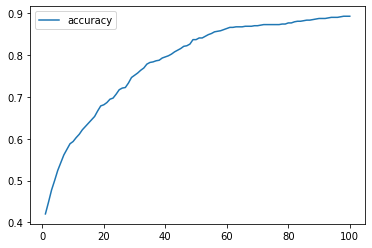

In [22]:
# Plot the loss
history_df.plot(y="accuracy")

In [23]:
# 19.2.5 Create the Connective Tissue, the Multiple-Neuron Neural Network
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [24]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [25]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 555us/step - loss: 0.8548 - accuracy: 0.5396
Epoch 2/100
24/24 [==============================] - 0s 691us/step - loss: 0.8446 - accuracy: 0.5150
Epoch 3/100
24/24 [==============================] - 0s 741us/step - loss: 0.7577 - accuracy: 0.5405
Epoch 4/100
24/24 [==============================] - 0s 823us/step - loss: 0.7761 - accuracy: 0.4869
Epoch 5/100
24/24 [==============================] - 0s 736us/step - loss: 0.7289 - accuracy: 0.4833
Epoch 6/100
24/24 [==============================] - 0s 779us/step - loss: 0.6842 - accuracy: 0.4962
Epoch 7/100
24/24 [==============================] - 0s 737us/step - loss: 0.6210 - accuracy: 0.5646
Epoch 8/100
24/24 [==============================] - 0s 837us/step - loss: 0.6236 - accuracy: 0.5249
Epoch 9/100
24/24 [==============================] - 0s 779us/step - loss: 0.6049 - accuracy: 0.5331
Epoch 10/100
24/24 [==============================] - 0s 911us/step - loss: 0.5808 - accura

24/24 [==============================] - 0s 675us/step - loss: 0.2554 - accuracy: 0.9075
Epoch 82/100
24/24 [==============================] - 0s 736us/step - loss: 0.2844 - accuracy: 0.8890
Epoch 83/100
24/24 [==============================] - 0s 737us/step - loss: 0.2565 - accuracy: 0.9064
Epoch 84/100
24/24 [==============================] - 0s 722us/step - loss: 0.2562 - accuracy: 0.9126
Epoch 85/100
24/24 [==============================] - 0s 694us/step - loss: 0.2651 - accuracy: 0.8980
Epoch 86/100
24/24 [==============================] - 0s 783us/step - loss: 0.2783 - accuracy: 0.8982
Epoch 87/100
24/24 [==============================] - 0s 694us/step - loss: 0.2741 - accuracy: 0.8885
Epoch 88/100
24/24 [==============================] - 0s 694us/step - loss: 0.2536 - accuracy: 0.9098
Epoch 89/100
24/24 [==============================] - 0s 752us/step - loss: 0.2508 - accuracy: 0.9118
Epoch 90/100
24/24 [==============================] - 0s 699us/step - loss: 0.2512 - accuracy: 

In [ ]:
# 19.2.6 Give Your Model a Synaptic Boost
# skipped 2 skill drills